<a href="https://colab.research.google.com/github/Romulan12/Binary-classifiaction-of-Musk-dataset/blob/master/Binary_classification_on_Musk_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [0]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import plot_model
from keras import backend as K


Reading data


In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/musk_csv.csv')

In [59]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [60]:
data.shape

(6598, 170)

In [0]:
df = data

Handling non-numerical data

In [0]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [63]:
df = handle_non_numerical_data(df)
print(df.head(20))

    ID  molecule_name  conformation_name  f1  ...  f164  f165  f166  class
0    1             84               5966  46  ...   -50  -112    96      1
1    2             84               4121  41  ...   -61  -136    79      1
2    3             84               5649  46  ...   -67  -145    39      1
3    4             84               6019  41  ...   -60  -135    80      1
4    5             84               4955  41  ...   -60  -135    80      1
5    6             84               5473  46  ...   -67  -145    40      1
6    7             84               5352  47  ...   -68  -145    37      1
7    8             84               6231  41  ...   -60  -135    81      1
8    9             84               2361  41  ...   -60  -135    81      1
9   10             84               5002  47  ...   -68  -146    37      1
10  11             84               3713  41  ...   -60  -135    81      1
11  12             84                356  44  ...   -65  -132    14      1
12  13             84    

Extracting important features

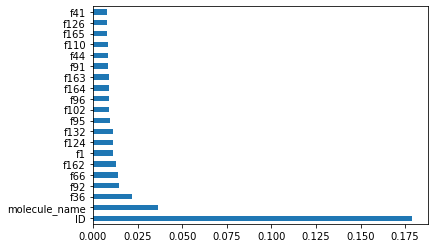

<Figure size 14400x7200 with 0 Axes>

In [64]:
X = df.iloc[:,0:169]  #independent columns
y = df.iloc[:,-1]    #target column i.e class

model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) #use inbuilt class feature_importances of tree based classifiers
feat_importances.nlargest(20).plot(kind='barh')

plt.figure(figsize= (200,100))
plt.show()

In [65]:
print(feat_importances.nlargest(50))

ID               0.178764
molecule_name    0.036613
f36              0.021637
f92              0.014735
f66              0.014212
f162             0.012803
f1               0.011515
f124             0.011366
f132             0.011162
f95              0.009647
f102             0.009246
f96              0.009140
f164             0.009039
f163             0.009023
f91              0.008336
f44              0.008226
f110             0.008183
f165             0.008078
f126             0.008027
f41              0.007994
f72              0.007708
f15              0.007674
f31              0.007493
f125             0.007414
f156             0.007055
f32              0.007033
f151             0.006801
f160             0.006739
f138             0.006610
f14              0.006516
f69              0.006335
f45              0.006296
f166             0.006246
f155             0.006131
f42              0.006102
f154             0.006064
f99              0.005960
f4               0.005821
f109        

PREPROCESS THE DATA

Text(0, 0.5, 'Frequency')

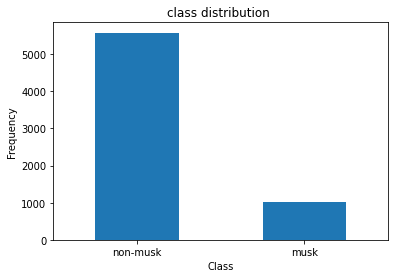

In [66]:
#plot the dataset frequency
labels = ['non-musk', 'musk']
classes = pd.value_counts(data['class'],sort = True)
classes.plot(kind = 'bar', rot = 0)
plt.title("class distribution ")
plt.xticks(range(2), labels )
plt.xlabel("Class")
plt.ylabel("Frequency")

Data Resampling

In [0]:
# Class count
count_class_0, count_class_1 = data['class'].value_counts()

# Divide by class
df_class_0 = data[data['class'] == 0]
df_class_1 = data[data['class'] == 1]

Data over-sampling

Random over-sampling:
1    5581
0    5581
Name: class, dtype: int64


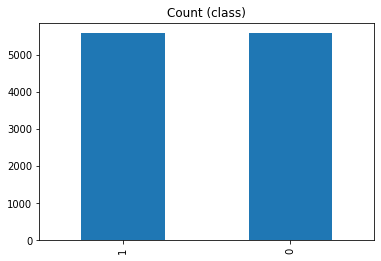

In [68]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['class'].value_counts())

df_test_over['class'].value_counts().plot(kind='bar', title='Count (class)');

In [69]:
df_test_over.shape

(11162, 170)

Careating a new dataframe without ID column and the 49 most important features

In [0]:
new_df = df_test_over[['molecule_name','f36','f92','f66', 'f1','f126','f162','f132','f163','f99', 
'f125', 'f96' ,'f95', 'f124' ,'f102'  ,'f104'  ,'f71' ,       
     'f15',      
'f165',            
'f80'  ,            
'f72'   ,           
'f105'   ,          
'f91'     ,         
'f160'     ,        
'f151'      ,       
'f69'        ,      
'f11'      ,        
'f41'       ,       
'f138'       ,      
'f3'         ,     
'f154'         ,    
'f103'          ,   
'f108'           ,  
'f161'           , 
'f166'             ,
'f25'      ,
'f4'       ,
'f140'      ,  
'f153'       ,  
'f110'        ,  
'f152'         ,  
'f65'           ,
'f123'           ,  
'f44'          ,
'f22'          ,
'f86'          ,
'f130',
'f164',  
'f42',
'class']].copy()

In [71]:
new_df.head(20)
print(new_df.shape)

(11162, 50)


In [72]:
X = new_df.iloc[:,0:49]
Y = new_df.iloc[:,-1]
X.head(2)

,molecule_name,f36,f92,f66,f1,f126,f162,f132,f163,f99,f125,f96,f95,f124,f102,f104,f71,f15,f165,f80,f72,f105,f91,f160,f151,f69,f11,f41,f138,f3,f154,f103,f108,f161,f166,f25,f4,f140,f153,f110,f152,f65,f123,f44,f22,f86,f130,f164,f42
1017,0,211,166,179,114,6,290,-138,143,-156,96,-55,30,-108,266,-284,-139,-284,-117,-166,-82,-292,114,34,-62,-118,-293,-93,-70,-144,83,-257,-120,254,60,111,-77,-33,-113,-248,-122,-146,130,-297,-22,23,-188,-58,161
1018,0,212,163,179,112,6,290,-138,143,-156,94,-54,30,-108,264,-284,-138,-284,-117,-165,-77,-292,111,36,-62,-117,-294,-92,-71,-144,85,-258,-120,255,60,111,-77,-33,-113,-248,-122,-146,130,-297,-22,23,-188,-58,162


In [73]:
Y.head(2)

1017    0
1018    0
Name: class, dtype: int64

In [74]:
#standardize input features 
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.70798651,  1.9994674 ,  1.4308566 , ..., -0.94303587,
        -0.1471547 ,  1.49809288],
       [-1.70798651,  2.01775856,  1.38414328, ..., -0.94303587,
        -0.1471547 ,  1.5094399 ],
       [-1.70798651, -0.04914296,  2.47412072, ..., -0.94303587,
        -0.1914836 ,  1.74772742],
       ...,
       [-0.68101756, -1.43927142, -1.35637141, ..., -0.94303587,
        -0.21364804, -0.96421142],
       [ 1.37292035, -0.65275137, -0.03282739, ..., -0.94303587,
        -0.16931915,  0.85131249],
       [-0.68101756, -1.43927142, -1.35637141, ..., -0.94303587,
        -0.21364804, -0.96421142]])

Training the model

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Normalize the testing and training set
X_train = normalize(X_train)
X_test = normalize(X_test)
X_train.shape

(8929, 49)

In [0]:
# Defining the model
my_model = Sequential()
#First layer 

my_model.add(Dense(25,activation= 'relu', kernel_initializer= 'random_normal', input_shape = (49,)))

my_model.add(Dropout(0.5))
#Second layer 
my_model.add(Dense(25, activation='relu', kernel_initializer= 'random_normal'))
my_model.add(Dropout(0.5))

#output
my_model.add(Dense(1, activation='sigmoid', kernel_initializer= 'random_normal'))

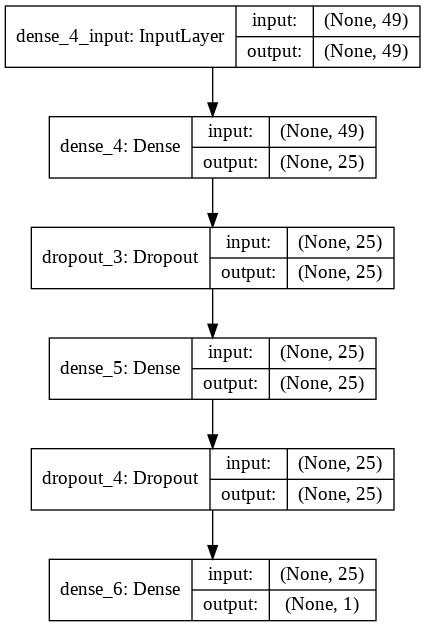

In [77]:

plot_model(my_model , show_shapes= True, expand_nested= True, to_file= 'model.png')


In [0]:
sgd = SGD(lr = 0.01, momentum=0.9)

Accuracy Metrices


In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
my_model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics= ['acc',f1_m,precision_m, recall_m])

In [81]:
history = my_model.fit(X_train,Y_train, validation_split= 0.20, batch_size = 32, epochs = 20)

Train on 7143 samples, validate on 1786 samples
Epoch 1/20
7143/7143 [==============================] - 1s 133us/step - loss: 0.6929 - acc: 0.5100 - f1_m: 0.3765 - precision_m: 0.3858 - recall_m: 0.4873 - val_loss: 0.6920 - val_acc: 0.4888 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
7143/7143 [==============================] - 1s 112us/step - loss: 0.6891 - acc: 0.5576 - f1_m: 0.4004 - precision_m: 0.5914 - recall_m: 0.4363 - val_loss: 0.6826 - val_acc: 0.5963 - val_f1_m: 0.3326 - val_precision_m: 0.9799 - val_recall_m: 0.2070
Epoch 3/20
7143/7143 [==============================] - 1s 115us/step - loss: 0.6479 - acc: 0.6641 - f1_m: 0.5623 - precision_m: 0.7637 - recall_m: 0.5000 - val_loss: 0.5449 - val_acc: 0.8046 - val_f1_m: 0.7899 - val_precision_m: 0.8440 - val_recall_m: 0.7543
Epoch 4/20
7143/7143 [==============================] - 1s 119us/step - loss: 0.4931 - acc: 0.7788 - f1_m: 0.7666 - precision_m: 0.7939 - recall_m: 0.7555 - val

In [82]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


In [83]:
val_accuracy = history.history['val_acc']
#print(val_accuracy)
val_mean_acc = np.mean(val_accuracy)
print(val_mean_acc)


0.8692609161138535


In [84]:
loss, accuracy, f1_score, precision, recall = my_model.evaluate(X_train,Y_train, verbose=0)
print(loss, accuracy, f1_score, precision, recall)


0.130253960962044 0.9552021622657776 0.9550321102142334 0.9407426118850708 0.9726693034172058


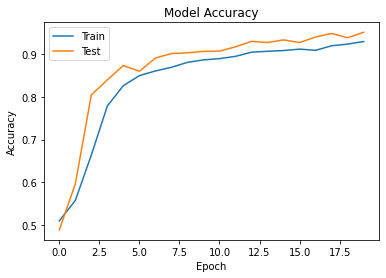

In [85]:
#Plot model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

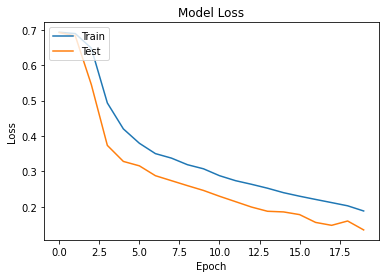

In [86]:
#plot model History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

In [87]:
y_pred = my_model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[1023   93]
 [  44 1073]]


In [88]:
print("Accuracy", accuracy *100)
print("Loss", loss*100)
print("F1- score", f1_score)
print("Recall", recall)
print("Precision", precision)
print("Validation accuracy", val_mean_acc)

Accuracy 95.52021622657776
Loss 13.0253960962044
F1- score 0.9550321102142334
Recall 0.9726693034172058
Precision 0.9407426118850708
Validation accuracy 0.8692609161138535


In [0]:
my_model.save("my_model.h5")